In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

True
[-0.11156112  0.12829995  1.44947994  0.93277538]


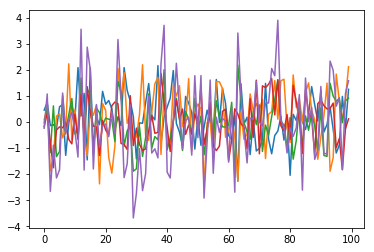

In [89]:
X = np.random.randn(100, 4)
m = np.random.randn(4)
y = X.dot(m)

df = pd.DataFrame(np.hstack((X, y[:, None])),
                  columns=['A', 'B', 'C', 'D', 'Z_real'])
def func(X, *params):
    return np.hstack(params).dot(X)

popt, pcov = curve_fit(func, df[['A', 'B', 'C', 'D']].T, df['Z_real'],
                       p0=np.random.randn(4))
print(np.allclose(popt, m))
print(popt)


In [59]:
headers = ['time', 'heart_rate']
dtypes = {'time': 'str', 'heart_rate': 'int'}
parse_dates = ['time']
sentinels = {'time': '0', 'heart_rate': 0}
big_one = pd.read_csv('raw/heart_rate.csv', header=None, names=headers, dtype=dtypes, na_values=sentinels, parse_dates=parse_dates)
big_one.set_index(['time'])

,heart_rate
time,
2017-11-21 02:56:40,68
2017-11-21 02:56:45,66
2017-11-21 02:56:50,65
2017-11-21 02:56:55,66
2017-11-21 02:57:00,67
2017-11-21 02:57:05,67
2017-11-21 02:57:10,68
2017-11-21 02:57:20,67
2017-11-21 02:57:25,66


In [69]:
df_list = []
for group in big_one.groupby(big_one['time'].dt.day):
    df_list.append(group[1])

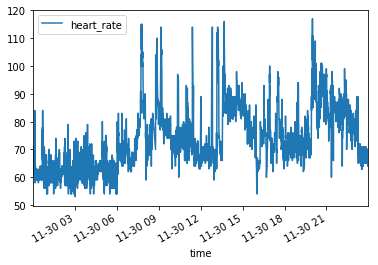

In [110]:
df_list[16].plot(x='time')

In [114]:
len(df_list[4])

11192

In [115]:
pd.rolling_mean?

In [119]:
big_one.resample?

In [127]:
df_list[0]

,time,heart_rate
194,2017-11-01 00:00:01,63
195,2017-11-01 00:00:06,57
197,2017-11-01 00:00:11,59
199,2017-11-01 00:00:16,60
201,2017-11-01 00:00:21,59
203,2017-11-01 00:00:26,63
205,2017-11-01 00:00:31,66
207,2017-11-01 00:00:36,59
209,2017-11-01 00:00:41,61
210,2017-11-01 00:00:56,63


In [131]:
day1 = df_list[0]

In [133]:
day1.

,time,heart_rate
194,2017-11-01 00:00:01,63
195,2017-11-01 00:00:06,57
197,2017-11-01 00:00:11,59
199,2017-11-01 00:00:16,60
201,2017-11-01 00:00:21,59
203,2017-11-01 00:00:26,63
205,2017-11-01 00:00:31,66
207,2017-11-01 00:00:36,59
209,2017-11-01 00:00:41,61
210,2017-11-01 00:00:56,63


In [141]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10178 entries, 194 to 20349
Data columns (total 2 columns):
time          10178 non-null datetime64[ns]
heart_rate    10178 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 238.5 KB


In [150]:
big_one.index?

In [152]:
big_one.resample('3T')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [154]:
pd.to_datetime(big_one.index, unit='s')

DatetimeIndex(['1970-01-01 00:00:00', '1970-01-01 00:00:01',
               '1970-01-01 00:00:02', '1970-01-01 00:00:03',
               '1970-01-01 00:00:04', '1970-01-01 00:00:05',
               '1970-01-01 00:00:06', '1970-01-01 00:00:07',
               '1970-01-01 00:00:08', '1970-01-01 00:00:09',
               ...
               '1970-01-02 17:49:34', '1970-01-02 17:49:35',
               '1970-01-02 17:49:36', '1970-01-02 17:49:37',
               '1970-01-02 17:49:38', '1970-01-02 17:49:39',
               '1970-01-02 17:49:40', '1970-01-02 17:49:41',
               '1970-01-02 17:49:42', '1970-01-02 17:49:43'],
              dtype='datetime64[ns]', length=150584, freq=None)

In [155]:
big_one.set_index('time')

,heart_rate
time,
2017-11-21 02:56:40,68
2017-11-21 02:56:45,66
2017-11-21 02:56:50,65
2017-11-21 02:56:55,66
2017-11-21 02:57:00,67
2017-11-21 02:57:05,67
2017-11-21 02:57:10,68
2017-11-21 02:57:20,67
2017-11-21 02:57:25,66


In [157]:
big_one = big_one.set_index('time')

In [162]:
big_one = big_one.sort_index()

In [169]:
big_sample = big_one.resample('5S').bfill()

In [173]:
df_list = []
for group in big_sample.groupby(big_sample.index.day):
    df_list.append(group[1])

In [180]:
len(df_list[28])

17280

In [193]:
idx = df_list[25].index

In [196]:
test = df_list[25]

In [204]:
test['hour'] = test.hour.dt.strftime('%H%M%S')

In [207]:
test.set_index('hour')

,heart_rate
hour,
000000,71
000005,71
000010,71
000015,68
000020,68
000025,68
000030,67
000035,67
000040,67


In [216]:
all_days = df_list
new_days = list()
for idx, df in enumerate(df_list):
    df['hour'] = df.index.strftime('%H%M%S')
    df = df.set_index('hour')
    new_days.append(df)

,heart_rate
hour,
000000,71
000005,71
000010,71
000015,68
000020,68
000025,68
000030,67
000035,67
000040,67


In [222]:
len(new_days)

30

In [241]:
month_rate = pd.DataFrame()

In [242]:
month_rate.insert(loc=0, column='time', value=new_days[0].index)

In [243]:
for idx, day in enumerate(new_days):
    month_rate.insert(loc=len(month_rate.columns), column='hr{}'.format(idx), value=day['heart_rate'].tolist())

ValueError: Length of values does not match length of index

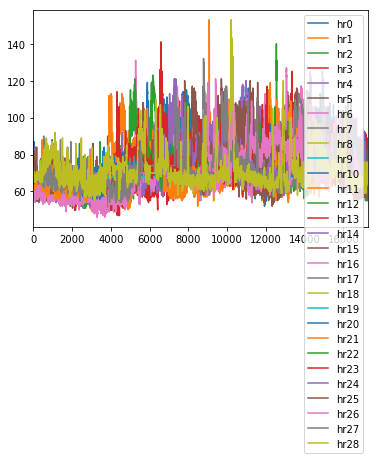

In [245]:
month_rate.plot()

In [240]:
len(month_rate.columns)

1

In [248]:
month_rate = month_rate.set_index('time')

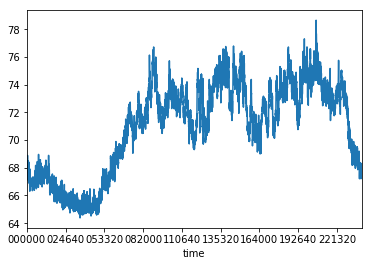

In [254]:
month_rate.mean(axis=1).plot()

In [255]:
avg_rate = month_rate.mean(axis=1)

In [273]:
xdata = np.array(avg_rate.index.values, dtype="float")

In [275]:
def func(x, a, b, c, d, e, f):
    return (a*x) + (b*x*x) + (c*x*x*x) + (d*x*x*x*x) + (e*x*x*x*x*x) + f

In [330]:
popt, pcov = curve_fit(func, new_xdata, avg_rate.values)

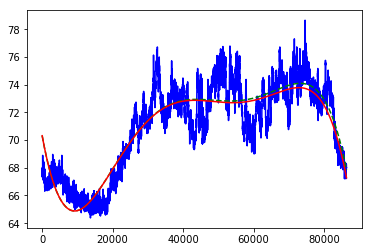

In [345]:
plt.plot(new_xdata, avg_rate.values, 'b-', label='hr')
plt.plot(new_xdata, func(new_xdata, *popt), 'g--', label='fit')
plt.plot(new_xdata, func(new_xdata, *arr), 'r-')

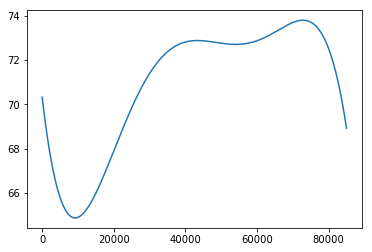

In [354]:
test_range = list(range(85000))
plt.plot(test_range, func(np.array(test_range, dtype="float"), *arr))

In [283]:
new_xdata = list()
for idx in range(len(xdata)):
    new_xdata.append(idx*5)

In [327]:
avg_rate.values

array([ 67.86206897,  67.65517241,  67.75862069, ...,  68.        ,
        68.        ,  68.        ])

In [329]:
new_xdata = np.array(new_xdata, dtype="float")

In [333]:
popt

array([ -1.40006006e-03,   1.14829493e-07,  -3.27110291e-12,
         4.00145962e-17,  -1.78367819e-22,   7.03160970e+01])

In [343]:
arr = np.array([ -0.0014, 0.0000001148, -0.000000000003271, 0.00000000000000004001, -0.0000000000000000000001784, 70.316], dtype="float")

In [344]:
arr

array([ -1.40000000e-03,   1.14800000e-07,  -3.27100000e-12,
         4.00100000e-17,  -1.78400000e-22,   7.03160000e+01])

In [350]:
max(new_xdata)

86395.0

In [355]:
24*60*60

86400